## Workbook to test convergence of the derivative of a function from a simple model

Define two points: (x1,y1) and (x2,y2) on straightlines with gradient -1 passing through (0.5,0.5) and (1.5,0.5) respectively.
The locations on each line are given by

$x1,y1 = 0.5 + \theta_1, 0.5 - \theta_1$

$x2,y2 = 1.5 + \theta_2, 0.5 - \theta_2$

If $\theta_1$ and $\theta_2$ are normally distributed random variables with mean of 0, then the average positions are (0.5,0.5) and (1.5,0.5) and so the gradient of the average is 0.

It is easy to compute however the gradient for each model realisation, and then compute the average of this.
Not only is the average nonzero, but is doesn't converge with ensemble size.

The same conclusion is reached for a uniform distribution.

The upshot is that if an ensemble converges (i.e. the average is defined), then the gradient of the average exists.
However, it is not always the case that the average gradient exists (in this example, it does not).


In [1]:
import numpy as np
number_values = 1000000

In [29]:
theta_vals = np.random.normal(loc=0,scale=1,size=(2,number_values) )

In [58]:
x1,y1 = 1.5 + theta_vals[0,:], 0.5 - theta_vals[0,:]
x2,y2 = 0.5 + theta_vals[1,:], 0.5 - theta_vals[1,:]


#### Gradient of average:

In [59]:
print( 'Gradient of average model is {0:f}'.format( (y2.mean() - y1.mean() ) / (x2.mean() - x1.mean() ) ))

Gradient of average model is -0.000025


In [60]:
print( 'Average absolute gradient of models is {0:f}'. format( abs((y2 - y1 ) / (x2 - x1 )).mean() ) )

Average absolute gradient of models is 0.613097


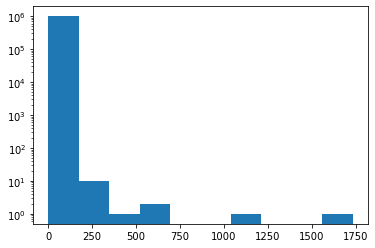

In [61]:
import matplotlib.pyplot as plt
plt.hist(abs( (y2 - y1 ) / (x2 - x1 )))
plt.yscale('log')

# See the high values

#### Plot convergence with n: the series does not converge.

In [62]:
trunc_grad = np.zeros(7)
for i in range(7):
    high = 10**i
    trunc_grad[i] =  abs((y2[0:high] - y1[0:high] ) / (x2[0:high] - x1[0:high] )).mean()

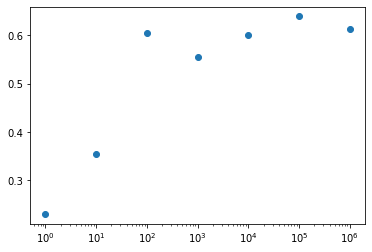

In [63]:
plt.figure()
plt.semilogx( [1,10,100,1000,10000,100000,1000000], trunc_grad,'o')

#### Now try a uniform distribution. This has the advantage that the gradient is never infinite.

In [64]:
theta_vals = np.random.uniform(low=0, high = 1, size=(2,number_values) )
x1,y1 = 1.5 + theta_vals[0,:], 0.5 - theta_vals[0,:]
x2,y2 = 0.5 + theta_vals[1,:], 0.5 - theta_vals[1,:]


In [65]:
print( 'Gradient of average model is {0:f}'.format( (y2.mean() - y1.mean() ) / (x2.mean() - x1.mean() ) ))

Gradient of average model is 0.000482


In [66]:
print( 'Average absolute gradient of models is {0:f}'. format( abs((y2 - y1 ) / (x2 - x1 )).mean() ) )

Average absolute gradient of models is 0.612394


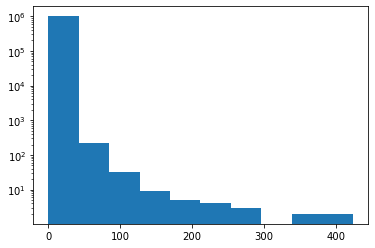

In [67]:
import matplotlib.pyplot as plt
plt.hist(abs( (y2 - y1 ) / (x2 - x1 )))
plt.yscale('log')

# See the high values

#### Plot convergence with n: the series does not converge.

In [68]:
trunc_grad = np.zeros(7)
for i in range(7):
    high = 10**i
    trunc_grad[i] =  abs((y2[0:high] - y1[0:high] ) / (x2[0:high] - x1[0:high] )).mean()

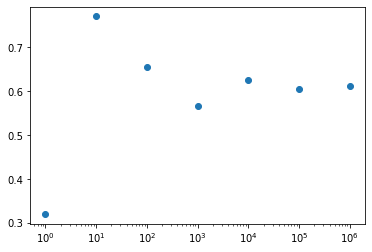

In [69]:
plt.figure()
plt.semilogx( [1,10,100,1000,10000,100000,1000000], trunc_grad,'o')
